Подключение библиотек:

In [2]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset 
#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

1-2:
Создание списка путей к картинкам, разделение на выборки:

In [3]:
images_list = []
images_list = glob.glob(os.path.join('C:/Users/user/Desktop/dataset/zebra','*.jpg'))
images_list2 = glob.glob(os.path.join('C:/Users/user/Desktop/dataset/bay horse','*.jpg'))

labels = []
for i in range(len(images_list)):
    labels.append(True)
for i in range(len(images_list2)):
    labels.append(False)

for i in images_list2:
    images_list.append(i)

train_list, train_test_val, train_val, test_val = train_test_split(images_list, labels, test_size=0.2, shuffle=True)
test_list, val_list, test, val = train_test_split(train_test_val, test_val, test_size=0.5)

Проверка:

In [4]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

2003
['C:/Users/user/Desktop/dataset/zebra\\0000.jpg', 'C:/Users/user/Desktop/dataset/zebra\\0001.jpg', 'C:/Users/user/Desktop/dataset/zebra\\0002.jpg', 'C:/Users/user/Desktop/dataset/zebra\\0003.jpg', 'C:/Users/user/Desktop/dataset/zebra\\0004.jpg']
1602
['C:/Users/user/Desktop/dataset/zebra\\0427.jpg', 'C:/Users/user/Desktop/dataset/zebra\\0890.jpg', 'C:/Users/user/Desktop/dataset/bay horse\\0759.jpg', 'C:/Users/user/Desktop/dataset/bay horse\\0396.jpg', 'C:/Users/user/Desktop/dataset/zebra\\0975.jpg']
200
['C:/Users/user/Desktop/dataset/zebra\\0918.jpg', 'C:/Users/user/Desktop/dataset/bay horse\\0762.jpg', 'C:/Users/user/Desktop/dataset/bay horse\\0024.jpg', 'C:/Users/user/Desktop/dataset/zebra\\0688.jpg', 'C:/Users/user/Desktop/dataset/bay horse\\0900.jpg']
201
['C:/Users/user/Desktop/dataset/zebra\\0088.jpg', 'C:/Users/user/Desktop/dataset/zebra\\0806.jpg', 'C:/Users/user/Desktop/dataset/bay horse\\0473.jpg', 'C:/Users/user/Desktop/dataset/zebra\\0204.jpg', 'C:/Users/user/Desktop/

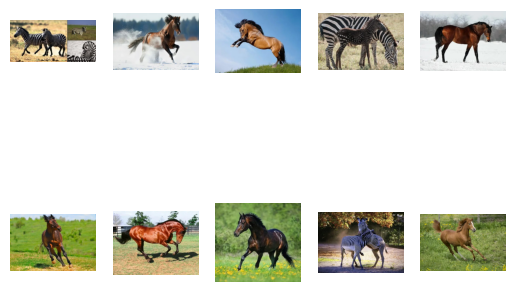

In [54]:
random_idx = np.random.randint(1,len(images_list),size=10)
fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')
plt.show()

Класс Dataset
(метки 0 - zebra, 1 - bay horse)

In [5]:
class ADataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img.convert("RGB")) #
        
        label = img_path.split('/')[-1].split('\\')[0]
        if label == 'zebra':
            label=0
        elif label == 'bay horse':
            label=1 
            
        return img_transformed,label

4:  Пайплайн предобработки данных 

In [6]:
func_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
  
train_data = ADataset(train_list, transform=func_transforms)
test_data = ADataset(test_list, transform=func_transforms)
val_data = ADataset(val_list, transform=func_transforms)

Проверка:

In [7]:
print(train_data[1])
print(val_data[0][1])

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 0)
0


3:  Сверточная нейронная сеть

In [8]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method

Загрузка наборов данных:

In [23]:
train_loader = DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = DataLoader(dataset = val_data, batch_size=batch_size, shuffle=True )
test_loader = DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True )

Проверка:

In [10]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1602 17
201 3


torch.Size([3, 224, 224])

Модель сверточной нейросети для решения задачи классификации:

In [51]:
class Cnn(nn.Module):

    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = torch.nn.Flatten()(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.Sigmoid()(out)

5:  Цикл обучения и эксперименты

In [52]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)

Задание параметров обработки:

In [53]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

Цикл обучения нейросети:

In [54]:
accuracy_values = []
loss_values = []
val_accuracy_values = []
val_loss_values = []
model.train()
def train_loop(train_loader, val_loader):
    epochs = 20
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)
            
            output = model(data)
            loss = criterion(output, label)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)  
        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
        accuracy_values.append(float(epoch_accuracy))
        loss_values.append(float(epoch_loss))
        model.eval()
        with torch.no_grad():
            
            epoch_val_accuracy=0
            epoch_val_loss =0
            for data, label in val_loader:
                data = data.to(device)
                label = label.to(device)
                
                val_output = model(data)
                val_loss = criterion(val_output,label)
                
                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader)
                epoch_val_loss += val_loss/ len(val_loader)
                
            val_accuracy_values.append(float(epoch_val_accuracy))
            val_loss_values.append(float(epoch_val_loss))
            print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))
            print('\n')

In [55]:
train_loop(train_loader, val_loader)

Epoch : 1, train accuracy : 0.47117653489112854, train loss : 0.6364156603813171
Epoch : 1, val_accuracy : 0.3700000047683716, val_loss : 0.694371223449707


Epoch : 2, train accuracy : 0.6852940917015076, train loss : 0.6400453448295593
Epoch : 2, val_accuracy : 0.79666668176651, val_loss : 0.5261099934577942


Epoch : 3, train accuracy : 0.7035293579101562, train loss : 0.6166396737098694
Epoch : 3, val_accuracy : 0.4700000286102295, val_loss : 0.6768515110015869


Epoch : 4, train accuracy : 0.7435294389724731, train loss : 0.597321093082428
Epoch : 4, val_accuracy : 0.8200000524520874, val_loss : 0.575295627117157


Epoch : 5, train accuracy : 0.7400001287460327, train loss : 0.584635853767395
Epoch : 5, val_accuracy : 0.8200000524520874, val_loss : 0.49701905250549316


Epoch : 6, train accuracy : 0.75352942943573, train loss : 0.566251814365387
Epoch : 6, val_accuracy : 0.846666693687439, val_loss : 0.5411489009857178


Epoch : 7, train accuracy : 0.7858823537826538, train loss :

6:  Построение графиков

In [56]:
def accuracy(train, val):
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), train, color="green")
    plt.plot(range(len(val)), val, color="red")
    plt.legend(["Train accuracy", "Valid accuracy"])
    plt.show()

def loss(train, val):
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), [float(value) for value in train], color="blue")
    plt.plot(range(len(val)), [float(value) for value in val], color="orange")
    plt.legend(["Train loss", "Valid loss"])
    plt.show()

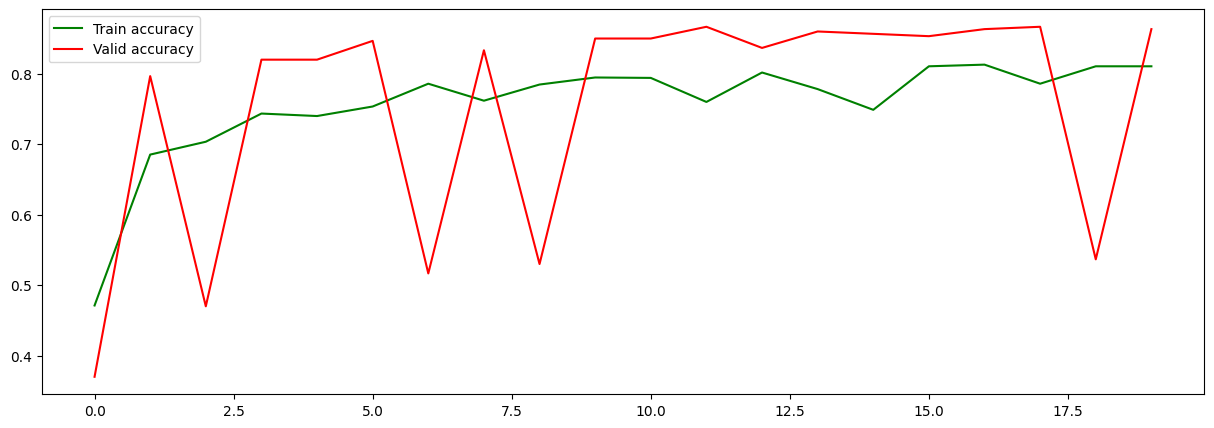

In [57]:
accuracy(accuracy_values, val_accuracy_values)

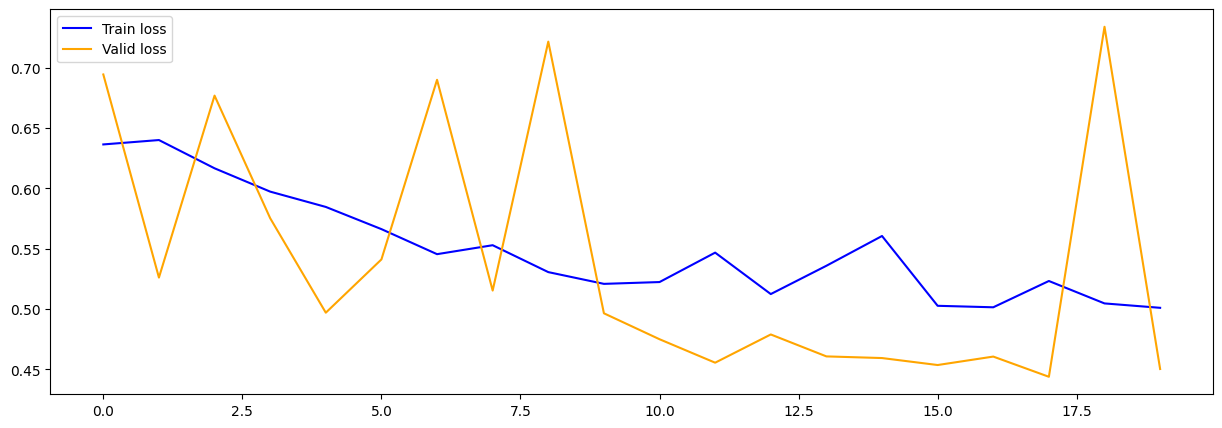

In [58]:
loss(loss_values, val_loss_values)

Сохранение модели:

In [79]:
torch.save(model.state_dict(), 'model.pt')